### Setup

In [1]:
import logging
from multiprocessing import cpu_count

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from bounded_rand_walkers.cpp import bound_map
from bounded_rand_walkers.data_generation import multi_random_walker
from bounded_rand_walkers.functions import Tophat_1D, Tophat_2D

logging.basicConfig(level=logging.INFO)
mpl.rc_file("matplotlibrc")

### 1D Case

INFO:bounded_rand_walkers.data_generation:New process: 0.
INFO:bounded_rand_walkers.data_generation:New process: 1.
INFO:bounded_rand_walkers.data_generation:New process: 2.
INFO:bounded_rand_walkers.data_generation:New process: 3.
INFO:bounded_rand_walkers.data_generation:time per step:4.9e-04 s
INFO:bounded_rand_walkers.data_generation:time per step:5.2e-04 s
INFO:bounded_rand_walkers.data_generation:time per step:5.4e-04 s
INFO:bounded_rand_walkers.data_generation:time per step:5.5e-04 s


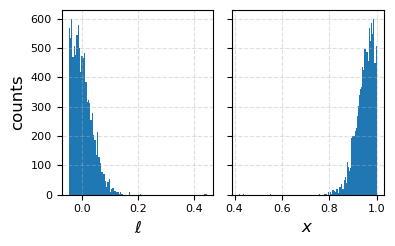

In [2]:
step_values, positions = multi_random_walker(
    n_processes=cpu_count(),
    f_i=Tophat_1D(width=0.5, centre=0.2),
    bounds=np.array([0, 1]),
    steps=int(1e4),
    seed=1,
)

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(4, 2.5))
axes[0].hist(step_values, bins="auto")
axes[0].set_xlabel(r"$\ell$")
axes[0].set_ylabel("counts")
axes[1].hist(positions, bins="auto")
axes[1].set_xlabel(r"$x$")

fig.tight_layout()

### 2D Case

INFO:bounded_rand_walkers.data_generation:New process: 0.
INFO:bounded_rand_walkers.data_generation:New process: 1.
INFO:bounded_rand_walkers.data_generation:New process: 2.
INFO:bounded_rand_walkers.data_generation:New process: 3.
INFO:bounded_rand_walkers.data_generation:Position index:4.0e+03 out of 2.5e+04
INFO:bounded_rand_walkers.data_generation:Time elapsed: 5.9 s, remaining:31.0 s
INFO:bounded_rand_walkers.data_generation:Position index:4.0e+03 out of 2.5e+04
INFO:bounded_rand_walkers.data_generation:Time elapsed: 6.0 s, remaining:31.6 s
INFO:bounded_rand_walkers.data_generation:Position index:4.0e+03 out of 2.5e+04
INFO:bounded_rand_walkers.data_generation:Time elapsed: 6.2 s, remaining:32.4 s
INFO:bounded_rand_walkers.data_generation:Position index:4.0e+03 out of 2.5e+04
INFO:bounded_rand_walkers.data_generation:Time elapsed: 6.2 s, remaining:32.7 s
INFO:bounded_rand_walkers.data_generation:time per step:1.4e-03 s
INFO:bounded_rand_walkers.data_generation:time per step:1.4e-0

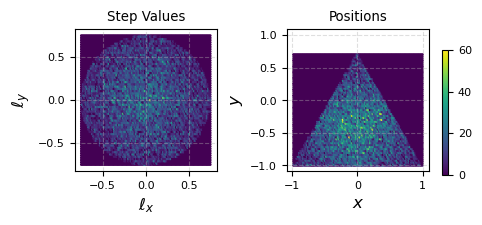

In [3]:
bounds = np.array(bound_map["triangle"]())

step_values, positions = multi_random_walker(
    n_processes=cpu_count(),
    f_i=Tophat_2D(extent=1.5),
    bounds=bounds,
    steps=int(1e5),
    blocks=10,
    seed=1,
)

fig, axes = plt.subplots(1, 2, figsize=(4.5, 2.5))
# Bin once to get the maximum bin counts which are then used below.
steps_bin = axes[0].hexbin(*step_values.T)
positions_bin = axes[1].hexbin(*positions.T)
axes[0].cla()
axes[1].cla()

# Use this max value with the hexbin vmax option in order to have the same colour
# scaling for both hexbin plots, such that the colorbar may be shared.
max_value = np.max([np.max(steps_bin.get_array()), np.max(positions_bin.get_array())])
steps_bin = axes[0].hexbin(*step_values.T, vmin=0, vmax=max_value)
positions_bin = axes[1].hexbin(*positions.T, vmin=0, vmax=max_value)

axes[0].set_title("Step Values")
axes[1].set_title("Positions")
for ax in axes:
    ax.axis("square")

axes[0].set_xlabel(r"$\ell_x$")
axes[0].set_ylabel(r"$\ell_y$")
axes[1].set_xlabel(r"$x$")
axes[1].set_ylabel(r"$y$")

cbar_height = 0.5
cbar_width = 0.013
fig.tight_layout()
_ = fig.colorbar(
    positions_bin,
    cax=fig.add_axes(
        [
            axes[1].get_position().xmax + 0.03,
            0.5 - cbar_height / 2,
            cbar_width,
            cbar_height,
        ]
    ),
)